
# Project 2

In [ ]:
#basic imports
CE, CU, CR, CG, CY, CB, CV, CT, CW, CK, CGR = '\33[0m','\33[4m','\33[31m','\33[32m','\33[33m','\33[34m','\33[35m','\33[36m','\33[37m', '\33[30m', '\33[90m'
BK, BR, BG, BY, BB, BV, BW = '\33[40m','\33[41m','\33[42m','\33[43m','\33[44m','\33[45m','\33[47m'
import sys
from pathlib import Path
import matplotlib.pyplot as plt
#train_input, train_target, test_input, test_target = prologue.load_data(one_hot_labels = True, normalize = True, flatten = False)
import torch
#from torch.nn import functional as F
from torch import optim
from torch import Tensor
from torch import nn
import numpy as np
import torch
from matplotlib import pyplot as plt

unzip = lambda x: list(zip(*x))
print('pythonpath=',sys.executable)
!pwd

/home/yanarof/Templates


# Generate data and squeleton

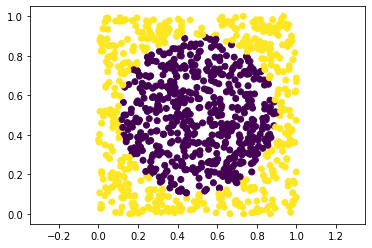

In [11]:
torch.set_grad_enabled(False)
N = 1000 #number of samples

def generate_disc_set(nb):
    """
    generates a dataset of nb samples of 2D points with labels 0 or 1
    """
    center = torch.tensor([0.5,0.5])
    radius = 1/torch.sqrt(torch.tensor(torch.pi*2))
    xy = torch.rand(nb,2)
    target = ((xy-center).pow(2).sum(axis=1) > radius**2).to(torch.int64)
    return xy, target

class Module(object):
    def forward(self, *input):
        """
        should get for input, and returns, a tensor or a tuple of tensors.
        """
        raise NotImplementedError
        

    def backward(self, *gradwrtoutput):
        """
        should get as input a tensor or a tuple of tensors containing the gradient of the loss with respect to the module's output, accumulate the gradient w.r.t the parameters,
        and return a tensor or a tuple of tensors containing the gradient of the loss w.r.t the module's input
        """
        pass
        

    def param(self):
        """
        should return a list of paris, each composed of a parameter tensor, and a gradient tensor of same size.
        This list should be empty for parameterless modules (e.g. ReLU).
        """
        return []

xy,cl = generate_disc_set(1000)
plt.scatter(xy[:,0],xy[:,1],c=cl) #plot data with color
plt.axis('equal')
plt.show()


# From TP3
## TODO


* Using MNIST
** Reduce the data-set (use --full for the full thing)
** Use 1000 train and 1000 test samples
train_input torch.Size([1000, 784]) train_target torch.Size([1000, 10])
test_input torch.Size([1000, 784]) test_target torch.Size([1000, 10])
epoch num= 0	error_test= tensor(0.8830)	error_train= tensor(0.9080)	loss_training= tensor(1000.0001)	loss_testing= tensor(963.6767)
epoch num= 10	error_test= tensor(0.8830)	error_train= tensor(0.8830)	loss_training= tensor(900.3156)	loss_testing= tensor(899.8846)
epoch num= 20	error_test= tensor(0.8830)	error_train= tensor(0.8830)	loss_training= tensor(899.0569)	loss_testing= tensor(899.0001)
epoch num= 30	error_test= tensor(0.7190)	error_train= tensor(0.7130)	loss_training= tensor(873.5353)	loss_testing= tensor(858.6427)
epoch num= 40	error_test= tensor(0.5760)	error_train= tensor(0.6140)	loss_training= tensor(732.4406)	loss_testing= tensor(723.1406)
epoch num= 50	error_test= tensor(0.4240)	error_train= tensor(0.4270)	loss_training= tenso

/tmp/ipykernel_34164/2205154774.py:163: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fh.show()


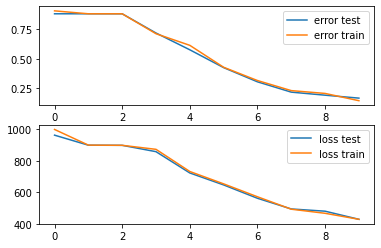

In [13]:
  
import numpy as np
import torch
import numpy
import matplotlib.pyplot as plt
import torch
from torch import Tensor
import dlc_practical_prologue as prologue


def tanh(x):
    """
    x: float tensor
    """
    return torch.div((torch.exp(x) - torch.exp(-x)),(torch.exp(x) + torch.exp(-x)))

def dtanh(x):
    """
    x: float tensor
    """
    return 4 * (x.exp() + x.mul(-1).exp()).pow(-2)

def forward_pass(w1,b1,w2,b2,x0):
    #Forward pass
    s1 = w1.mv(x0) + b1
    x1 = sigma(s1)
    s2 = w2.mv(x1) + b2
    x2 = sigma(s2)
    return x0,s1,x1,s2,x2
 
def sigma(x):
    return tanh(x)
 
def dsigma(x):
    return dtanh(x)
 
def index2onehot(array_target: torch.Tensor) -> torch.Tensor:
    """
    convert a index of classes to one-hot encoding
    """
    n_samples = len(array_target)
    n_classes = 10
    tt = torch.zeros((n_samples,n_classes))
    for i,s in enumerate(array_target):
        tt[i,s] = 1
    return tt
 
def loss(v, t):
    #compute torch norm
    return torch.sum(torch.pow(v-t,2))


def dloss(v, t):
    return 2*(v-t)


def forward_pass(w1,b1,w2,b2,x0):
    #Forward pass
    s1 = w1.mv(x0) + b1
    x1 = sigma(s1)
    s2 = w2.mv(x1) + b2
    x2 = sigma(s2)
    return x0,s1,x1,s2,x2


def backward_pass(w1,b1,w2,b2,
                  t,
                  x,s1,x1,s2,x2,
                  dl_dw1,dl_db1,dl_dw2,dl_db2):
    dl_dx2 = dloss(x2,t)
    dl_ds2 = dl_dx2 * dsigma(s2)
    dl_dx1 = w2.t().mv(dl_ds2)
    dl_ds1 = dl_dx1 * dsigma(s1)
    dl_dx0 = w1.t().mv(dl_ds1)

    dl_dw1.add_(dl_ds1.reshape(-1,1).mm(x0.reshape(1,-1)))
    dl_db1.add_(dl_ds1)
    dl_dw2.add_(dl_ds2.reshape(-1,1).mm(x1.reshape(1,-1)))
    dl_db2.add_(dl_ds2)
    return dl_dw1,dl_db1,dl_dw2,dl_db2



def predict(w1,b1,w2,b2,x0):
    _,_,_,_,x2 = forward_pass(w1,b1,w2,b2,x0)
    assert x2.size(0)==10, f'incorrect shape for x2: {x2.size(0)}'
    return torch.argmax(x2)


train_input,train_target,test_input,test_target = prologue.load_data(one_hot_labels=True, normalize=True)
n_samples = train_target.size(0)
print('train_input', train_input.size(), 'train_target', train_target.size())
print('test_input', test_input.size(), 'test_target', test_target.size())

x = train_input
#tt = train_target

hist_error_test, hist_error_train, hist_loss_training, hist_loss_testing = [], [], [], []
size_input = 784
size_hidden = 50
size_output = 10

e = 1e-6
learning_rate = 0.1/n_samples
torch.manual_seed(1234)
w1 = torch.normal(mean=0,std=e,size=(size_hidden,size_input))
b1 = torch.normal(mean=0,std=e,size=(size_hidden,))
w2 = torch.normal(mean=0,std=e,size=(size_output,size_hidden))
b2 = torch.normal(mean=0,std=e,size=(size_output,))
dl_dw1 = torch.zeros_like(w1)
dl_db1 = torch.zeros_like(b1)
dl_dw2 = torch.zeros_like(w2)
dl_db2 = torch.zeros_like(b2)

for epoch_i in range(100):

    dl_dw1.zero_()
    dl_db1.zero_()
    dl_dw2.zero_()
    dl_db2.zero_()
    loss_training = 0
    error_train = 0
    for i in range(n_samples):
        x0 = train_input[i,:]
        t = train_target[i,:]
        x0,s1,x1,s2,x2 = forward_pass(w1,b1,w2,b2,train_input[i,:])
        dl_dw1,dl_db1,dl_dw2,dl_db2 = backward_pass(w1,b1,w2,b2,
                                                    t,
                                                    train_input,s1,x1,s2,x2,
                                                    dl_dw1,dl_db1,dl_dw2,dl_db2)
        #print('-----', torch.argmax(x2)!=torch.argmax(train_target[i]))
        #stop()
        error_train += torch.argmax(x2)!=torch.argmax(train_target[i])
        loss_training += loss(x2,t) #measure current loss
    w1 = w1 - learning_rate*dl_dw1
    b1 = b1 - learning_rate*dl_db1
    w2 = w2 - learning_rate*dl_dw2
    b2 = b2 - learning_rate*dl_db2
    loss_test = 0
    error_test = 0
    for i in range(train_target.size(0)):
        t = train_target[i,:]
        _,_,_,_,x2 = forward_pass(w1,b1,w2,b2,train_input[i,:])
        error_test += torch.argmax(x2)!=torch.argmax(train_target[i])
        loss_test += loss(x2,t)

    if(epoch_i % 10 == 0):
        print('epoch num=', epoch_i, end='\t')
        print('error_test=', error_test/test_target.size(0), end='\t')
        print('error_train=', error_train/train_target.size(0), end='\t')
        print('loss_training=', loss_training, end='\t')
        print('loss_testing=', loss_test)

        hist_error_test.append(error_test/test_target.size(0))
        hist_error_train.append(error_train/train_target.size(0))
        hist_loss_training.append(loss_training)
        hist_loss_testing.append(loss_test)



fh, axs = plt.subplots(2,1)
f1 = axs[0].plot(hist_error_test,label='error test')
f2 = axs[0].plot(hist_error_train,label='error train')
f3 = axs[1].plot(hist_loss_testing,label='loss test')
f4 = axs[1].plot(hist_loss_training,label='loss train')
axs[0].legend()
axs[1].legend()
fh.savefig('loss_accuracy.png')
fh.show()


#torch.manual_seed(123)
#w1 = torch.normal(mean=0,std=e,size=(size_hidden,size_input))
#w1 = w1.unsqueeze(-1).repeat(1,1,n_samples)
#b1 = torch.normal(mean=0,std=e,size=(size_hidden,))
#s1 = w1.mm(x) + b1
